<a href="https://colab.research.google.com/github/rattakan06/rattakan06-229352-StatisticalLearning-or-Statistical-Learning-Labs./blob/main/lab05_decision_tree_bagging_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [ ]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier



In [ ]:
# import data
data = pd.read_csv('heart_disease.csv', na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [ ]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [ ]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

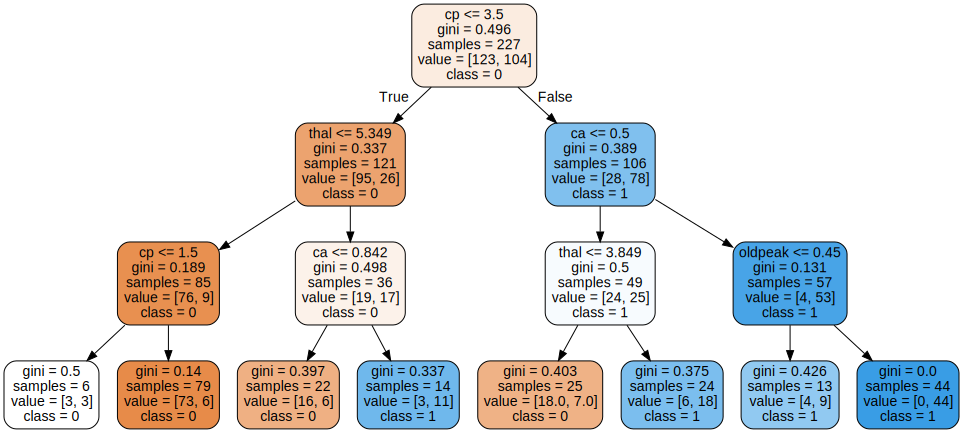

In [ ]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf_bag = BaggingClassifier(clf, n_estimators=100, random_state=42)
clf_bag.fit(X_train, y_train)


0.8421052631578947

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [ ]:
# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

#creae a Bagged Dicision Trees
clf_bag = BaggingClassifier(clf, n_estimators=100, random_state=42)

#create a Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# สร้าง Pipeline
pipe_dt = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('dt', DecisionTreeClassifier(random_state=42))
])

params_dt = {
    'dt__max_depth': [3, 6, 9, 12],
    'dt__min_samples_split': [2, 5, 10],
    'dt__criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(pipe_dt, params_dt, scoring='f1_macro', cv=5)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [3, 6, 9, 12],
                         'dt__min_samples_split': [2, 5, 10]},
             scoring='f1_macro')

In [ ]:
pipe_bag = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('bag', BaggingClassifier(DecisionTreeClassifier(), random_state=42))
])


params_bag = {
    'bag__n_estimators': [10, 50, 100],
    'bag__max_samples': [0.5, 0.8, 1.0],
    'bag__estimator__max_depth': [3, 5, None]
}

grid_bag = GridSearchCV(pipe_bag, params_bag, scoring='f1_macro', cv=5)
grid_bag.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('bag',
                                        BaggingClassifier(estimator=DecisionTreeClassifier(),
                                                          random_state=42))]),
             param_grid={'bag__estimator__max_depth': [3, 5, None],
                         'bag__max_samples': [0.5, 0.8, 1.0],
                         'bag__n_estimators': [10, 50, 100]},
             scoring='f1_macro')

In [ ]:
pipe_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('rf', RandomForestClassifier(random_state=42))
])

params_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [5, 10, None],
    'rf__max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(pipe_rf, params_rf, scoring='f1_macro', cv=5)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf__max_depth': [5, 10, None],
                         'rf__max_features': ['sqrt', 'log2'],
                         'rf__n_estimators': [50, 100, 200]},
             scoring='f1_macro')

In [ ]:
results = [grid_dt, grid_bag, grid_rf] #จากด้านบน
names = ['Decision Tree', 'Bagged Tree', 'Random Forest']

for i, grid in enumerate(results):
    y_pred = grid.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='macro')
    acc = (y_pred == y_test).mean()

    print(f"--- {names[i]} ---")
    print(f"Best Params: {grid.best_params_}")
    print(f"Test Accuracy: {acc:.4f}")
    print(f"Test F1 Macro: {f1:.4f}\n")

--- Decision Tree ---
Best Params: {'dt__criterion': 'gini', 'dt__max_depth': 3, 'dt__min_samples_split': 2}
Test Accuracy: 0.6447
Test F1 Macro: 0.6442

--- Bagged Tree ---
Best Params: {'bag__estimator__max_depth': 3, 'bag__max_samples': 0.5, 'bag__n_estimators': 100}
Test Accuracy: 0.7368
Test F1 Macro: 0.7361

--- Random Forest ---
Best Params: {'rf__max_depth': 5, 'rf__max_features': 'sqrt', 'rf__n_estimators': 100}
Test Accuracy: 0.7500
Test F1 Macro: 0.7496



What is your best model? = Random Forest

What hyperparameters did you choose? =
n_estimators: เพื่อกำหนดปริมาณของต้นไม้ตัดสินใจที่จะนำมาใช้ร่วมกันพยากรณ์


max_depth : เพื่อควบคุมขนาดและความซับซ้อนของต้นไม้แต่ละต้นในป่า ไม่ให้จดจำรายละเอียดข้อมูลมากจนเกินไป


max_features : จำนวนหัวข้อข้อมูลที่สุ่มมาพิจารณาในแต่ละกิ่ง: เพื่อกำหนดจำนวนฟีเจอร์ที่จะสุ่มเลือกมาใช้ในการตัดสินใจแยกกิ่ง เพื่อสร้างความหลากหลายให้แก่ต้นไม้แต่ละต้น"

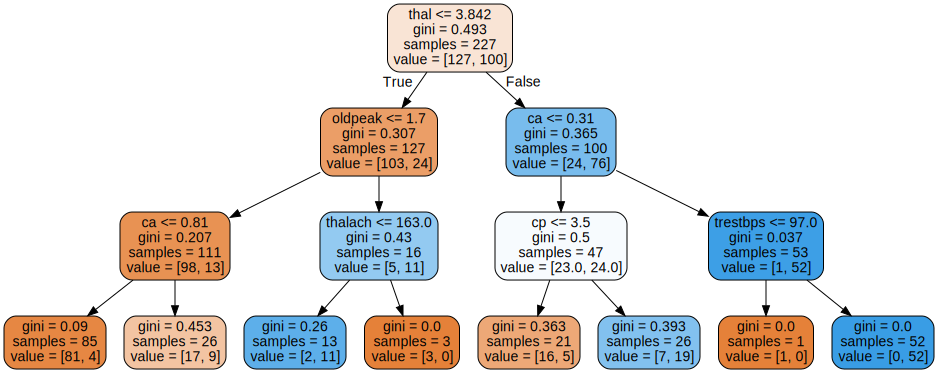

In [ ]:
best_tree = grid_dt.best_estimator_.named_steps['dt']

dot_data = export_graphviz(best_tree, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph